In [1]:
#  LRCN-based LMP prediction program 
#  by Vasudharini Sridharan and Mingjian Tuo 
#  ebsite: https://rpglab.github.io/


import datetime
start = datetime.datetime.now()
start

datetime.datetime(2022, 4, 5, 16, 25, 55, 879252)

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras import optimizers
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.recurrent import LSTM
from keras.layers import TimeDistributed
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.
D:\Visual Studio2019\Shared\Anaconda3_64\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Visual Studio2019\Shared\Anaconda3_64\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Visual Studio2019\Shared\Anaconda3_64\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Visual Studio2019\Shared\Anac

In [3]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\tmj89\Desktop\LRCN-Codes - Copy


In [5]:
# -*- coding: utf-8 -*-
import pandas as pd
load = pd.read_csv(os.path.join(cwd,'dataset_train_4_0to200.csv'))

In [5]:
load.head

<bound method NDFrame.head of       Delivery Date  Delivery Hour Repeated Hour Flag Settlement Point Name  \
0          1/1/2015              1                  N            LZ_HOUSTON   
1          1/1/2015              2                  N            LZ_HOUSTON   
2          1/1/2015              3                  N            LZ_HOUSTON   
3          1/1/2015              4                  N            LZ_HOUSTON   
4          1/1/2015              5                  N            LZ_HOUSTON   
...             ...            ...                ...                   ...   
34633    12/31/2018             20                  N            LZ_HOUSTON   
34634    12/31/2018             21                  N            LZ_HOUSTON   
34635    12/31/2018             22                  N            LZ_HOUSTON   
34636    12/31/2018             23                  N            LZ_HOUSTON   
34637    12/31/2018             24                  N            LZ_HOUSTON   

      Settlement Poin

In [6]:
load.dtypes

import datetime
load['year'] = pd.DatetimeIndex(load['Delivery Date']).year
load['day'] = pd.DatetimeIndex(load['Delivery Date']).day# Extracting Day from "Delivery Date"
load['month'] = pd.DatetimeIndex(load['Delivery Date']).month   # Extracting Month from "Delivery Date"


a = load['Delivery Date']
a= pd.to_datetime(a)

load['dayofweek'] = a.dt.dayofweek
load['dayofweek']

0        3
1        3
2        3
3        3
4        3
        ..
34633    0
34634    0
34635    0
34636    0
34637    0
Name: dayofweek, Length: 34638, dtype: int64

In [7]:
load = load.set_index(['Delivery Date']) 
load = load.drop(columns=['year','day','Settlement Point Name','Settlement Point Type'], axis=1)  
# Re-arranging Columns
load = load[['dayofweek','month','Delivery Hour','Temperature in F','Load in Houston', 'Settlement Point Price']]
load.head()

,dayofweek,month,Delivery Hour,Temperature in F,Load in Houston,Settlement Point Price
Delivery Date,,,,,,
1/1/2015,3,1,1,44,9844.20,22.47
1/1/2015,3,1,2,44,9653.46,22.31
1/1/2015,3,1,3,44,9502.30,22.20
1/1/2015,3,1,4,44,9474.48,22.13
1/1/2015,3,1,5,44,9554.37,22.16


In [8]:
# Removing "," from columns "Load in Houston" , "Ercot Load" and "Settlement Point Price"
load['Load in Houston'] = load['Load in Houston'].astype(str).str.replace(r',', '')
#load['Ercot Load'] = load['Ercot Load'].astype(str).str.replace(r',', '')
load['Settlement Point Price'] = load['Settlement Point Price'].astype(str).str.replace(r',', '')
load.head()

,dayofweek,month,Delivery Hour,Temperature in F,Load in Houston,Settlement Point Price
Delivery Date,,,,,,
1/1/2015,3,1,1,44,9844.2,22.47
1/1/2015,3,1,2,44,9653.46,22.31
1/1/2015,3,1,3,44,9502.3,22.2
1/1/2015,3,1,4,44,9474.48,22.13
1/1/2015,3,1,5,44,9554.37,22.16


In [9]:
load['Settlement Point Price'] = load['Settlement Point Price'].astype(float)
load['Temperature in F'] = load['Temperature in F'].astype(float)
load['Load in Houston'] = load['Load in Houston'].astype(float)
#load['Ercot Load'] = load['Ercot Load'].astype(float)
load['Settlement Point Price'] = round(load['Settlement Point Price'],2)
load.dtypes
#dataset = load.values

dayofweek                   int64
month                       int64
Delivery Hour               int64
Temperature in F          float64
Load in Houston           float64
Settlement Point Price    float64
dtype: object

In [10]:
# setting bin size
past_days = p_d
n_steps = past_days*24
next_days = n_d
next_steps = next_days*24


In [11]:
# Data Normalization
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, QuantileTransformer, PowerTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([("1",OneHotEncoder(sparse=False),make_column_selector(pattern = 'month')),
                             ("2",OneHotEncoder(sparse=False),make_column_selector(pattern = 'dayofweek')),
                             ("3",OneHotEncoder(sparse=False),make_column_selector(pattern = 'Delivery Hour')),
                             #("4",OneHotEncoder(sparse=False),make_column_selector(pattern = 'Delivery Interval')),
                             #("6",OneHotEncoder(sparse=False),make_column_selector(pattern = 'DayStatus')),
                             ("7",StandardScaler(copy=True), make_column_selector(pattern = 'Temperature in F')),
                             ("8",StandardScaler(copy=True), make_column_selector(pattern = 'Load in Houston')),
                             #("9",StandardScaler(copy=True), make_column_selector(pattern = 'Ercot Load')),
                             #("10",StandardScaler(copy=True),make_column_selector(pattern = 'Rise')),
                             ("y",StandardScaler(copy=True), make_column_selector(pattern = 'Settlement Point Price'))])

In [12]:
import numpy
dataset=load.values

In [13]:
normed_data = ct.fit_transform(load)
print(normed_data.shape)

(34638, 46)


In [14]:
normed_data = pd.DataFrame(normed_data)
dataset = normed_data.values
dataset=numpy.around(dataset, decimals=5, out=None)
dataset

array([[ 1.     ,  0.     ,  0.     , ..., -1.74483, -0.75033, -0.06364],
       [ 1.     ,  0.     ,  0.     , ..., -1.74483, -0.82378, -0.07058],
       [ 1.     ,  0.     ,  0.     , ..., -1.74483, -0.88198, -0.07535],
       ...,
       [ 0.     ,  0.     ,  0.     , ..., -0.98578, -0.5402 , -0.34257],
       [ 0.     ,  0.     ,  0.     , ..., -0.98578, -0.62114, -0.32739],
       [ 0.     ,  0.     ,  0.     , ..., -0.98578, -0.68715, -0.3712 ]])

In [15]:
dataset.shape

(34638, 46)

In [16]:
series_reshaped =  np.array([dataset[i:i + (n_steps+next_steps)].copy() for i in range((len(dataset) - (n_steps+next_steps)))])
series_reshaped

array([[[ 1.     ,  0.     ,  0.     , ..., -1.74483, -0.75033,
         -0.06364],
        [ 1.     ,  0.     ,  0.     , ..., -1.74483, -0.82378,
         -0.07058],
        [ 1.     ,  0.     ,  0.     , ..., -1.74483, -0.88198,
         -0.07535],
        ...,
        [ 1.     ,  0.     ,  0.     , ..., -1.88284, -0.27102,
         -0.05149],
        [ 1.     ,  0.     ,  0.     , ..., -1.95185, -0.40363,
         -0.09834],
        [ 1.     ,  0.     ,  0.     , ..., -2.02085, -0.55277,
         -0.13348]],

       [[ 1.     ,  0.     ,  0.     , ..., -1.74483, -0.82378,
         -0.07058],
        [ 1.     ,  0.     ,  0.     , ..., -1.74483, -0.88198,
         -0.07535],
        [ 1.     ,  0.     ,  0.     , ..., -1.74483, -0.89269,
         -0.07839],
        ...,
        [ 1.     ,  0.     ,  0.     , ..., -1.95185, -0.40363,
         -0.09834],
        [ 1.     ,  0.     ,  0.     , ..., -2.02085, -0.55277,
         -0.13348],
        [ 1.     ,  0.     ,  0.     , ..., -2.0

In [17]:
series_reshaped.shape

(34542, 96, 46)

In [18]:
a = series_reshaped.shape[0]
b = int(0.9*a)
c = int(a-b)
d = int(c/2)
X_train = series_reshaped[:b, :n_steps]
X_val = series_reshaped[b:, :n_steps]

print(X_train.shape, X_val.shape)

(31087, 48, 46) (3455, 48, 46)


In [19]:
dataset1 = dataset[1:,:normed_data.shape[1]-1]
dataset1[0]

array([ 1.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  1.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  1.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     , -1.74483, -0.82378])

In [20]:
price=np.array(dataset[:len(normed_data)-1,normed_data.shape[1]-1])
price.shape

(34637,)

In [21]:
dataset1 = np.column_stack((dataset1,price))
dataset1[0]

array([ 1.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  1.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  1.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     , -1.74483, -0.82378, -0.06364])

In [22]:
series_reshaped1 =  np.array([dataset1[i:i + (n_steps+next_steps)].copy() for i in range((len(dataset) - (n_steps+next_steps)))])
series_reshaped1.shape

(34542, 96, 46)

In [23]:
a = series_reshaped1.shape[0]
b = int(0.9*a)
c = int(a-b)
d = int(c/2)
X1_train = series_reshaped1[:b, n_steps-24:n_steps]
X1_val = series_reshaped1[b:, n_steps-24:n_steps]

print(X1_train.shape,X1_val.shape)

(31087, 24, 46) (3455, 24, 46)


In [24]:
X2_train = np.empty((X_train.shape[0], next_steps+24, X_train.shape[2]))
X2_val = np.empty((X_val.shape[0], next_steps+24, X_train.shape[2]))
a= len(X_train)
for i in range(0,a):
    X2_train[i] = np.append(X_train[i],X1_train[i],axis=0)
for i in range(0,len(X_val)):
    X2_val[i] = np.append(X_val[i],X1_val[i],axis=0)

In [25]:
print(X2_train.shape, X2_val.shape)

(31087, 72, 46) (3455, 72, 46)


In [26]:
Y = np.empty((series_reshaped.shape[0], next_steps))
Y.shape

(34542, 48)

In [27]:
for step_ahead in range(0, next_steps):
    Y[..., step_ahead] = series_reshaped[..., step_ahead+n_steps-next_steps+24, (X_train.shape[2]-1)]

In [28]:
Y_train = Y[:b]
Y_val = Y[b:]

In [29]:
print(Y_train.shape, Y_val.shape)

(31087, 48) (3455, 48)


In [30]:
X2_val[0,:,45]

array([-0.19551, -0.21677, -0.1786 ,  0.07084,  0.17105,  0.26692,
        0.32374,  0.48989,  1.05947,  0.22874,  0.11942,  0.06346,
        0.0973 ,  0.00967, -0.10702, -0.20723, -0.20983, -0.23889,
       -0.26709, -0.28965, -0.30787, -0.30873, -0.3057 , -0.29876,
       -0.23889, -0.25451, -0.2159 , -0.1556 ,  0.01705,  0.10598,
        0.17365,  0.23395,  0.30292,  0.25824,  0.18753,  0.18753,
        0.09036, -0.01982, -0.15734, -0.18771, -0.19378, -0.22154,
       -0.23325, -0.24453, -0.23672, -0.20332, -0.18857, -0.1786 ,
       -0.23889, -0.25451, -0.2159 , -0.1556 ,  0.01705,  0.10598,
        0.17365,  0.23395,  0.30292,  0.25824,  0.18753,  0.18753,
        0.09036, -0.01982, -0.15734, -0.18771, -0.19378, -0.22154,
       -0.23325, -0.24453, -0.23672, -0.20332, -0.18857, -0.1786 ])

In [31]:
Y_val[0]

array([-0.23889, -0.25451, -0.2159 , -0.1556 ,  0.01705,  0.10598,
        0.17365,  0.23395,  0.30292,  0.25824,  0.18753,  0.18753,
        0.09036, -0.01982, -0.15734, -0.18771, -0.19378, -0.22154,
       -0.23325, -0.24453, -0.23672, -0.20332, -0.18857, -0.1786 ,
       -0.07405, -0.13305,  0.0999 ,  0.22614,  0.32201,  0.31594,
        0.39575,  0.42178,  0.43436,  0.33893,  0.26301,  0.2218 ,
        0.31897,  0.10815, -0.05843, -0.15647, -0.19942, -0.22892,
       -0.2415 , -0.248  , -0.23933, -0.212  , -0.16341, -0.09314])

In [61]:
model = Sequential([
    Conv1D(filters=64, kernel_size=2,strides=2, padding="valid", activation="relu", input_shape=(X2_train.shape[1],X2_train.shape[2])),
    Conv1D(filters=64, kernel_size=1, strides=1, padding="causal", activation="relu"),
    LSTM(48, return_sequences=True),
    LSTM(256, return_sequences=True),
    #Flatten(),
    Dense(256, activation = "relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(32, activation="relu"),
    Flatten(),
    Dropout(0.1),
    Dense(next_steps)
])

In [62]:
from tensorflow import keras
#lr_schedule = keras.optimizers.schedules.ExponentialDecay(5e-4,
#                                                decay_steps=1000000,
#                                                decay_rate=0.98,
#                                                  staircase=False)


In [63]:
from keras import backend as K
from keras.callbacks import ReduceLROnPlateau, TensorBoard, ModelCheckpoint
#lr_schedule = keras.optimizers.schedules.ExponentialDecay(5e-4,
#                                               decay_steps=1000000,
#                                               decay_rate=0.98,
#                                                  staircase=False)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.2, patience=10, mode='auto')
from tensorflow import keras
optimizer = keras.optimizers.Adam(lr=0.01, beta_1=1e-6)

In [64]:
model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 72, 48)            18240     
_________________________________________________________________
lstm_47 (LSTM)               (None, 72, 48)            18624     
_________________________________________________________________
lstm_48 (LSTM)               (None, 72, 256)           312320    
_________________________________________________________________
dense_97 (Dense)             (None, 72, 256)           65792     
_________________________________________________________________
dense_98 (Dense)             (None, 72, 128)           32896     
_________________________________________________________________
dense_99 (Dense)             (None, 72, 64)            8256      
_________________________________________________________________
dropout_38 (Dropout)         (None, 72, 64)            0         
__________

In [66]:
example_batch= X2_val[0:10]
example_batch.shape

(10, 72, 46)

In [67]:
example_result = model.predict(example_batch)
example_result.shape

(10, 48)

In [68]:
example_result

array([[ 1.21671846e-02, -5.28483186e-03, -1.87845435e-04,
         2.12311335e-02, -2.48268177e-03, -1.47146704e-02,
         5.13058389e-03,  7.64301699e-03,  1.67187080e-02,
         6.17232174e-04,  1.47616239e-02, -8.68495833e-03,
         4.13034577e-03, -1.07060894e-02,  3.84451635e-03,
         4.74983361e-03, -3.54794692e-03, -9.19620041e-03,
         6.98003918e-04,  7.45338807e-03,  1.55164674e-02,
        -3.96160036e-03,  1.89155135e-02,  2.51811603e-03,
         5.76634612e-03, -1.01473462e-02,  2.17409898e-03,
         2.72665359e-03, -2.64699641e-03, -8.42061359e-03,
         1.50139956e-03,  1.69325359e-02, -9.60679818e-03,
        -1.30255688e-02, -5.74663887e-03,  2.18999246e-03,
         1.86687391e-02, -1.55913318e-02, -2.32941005e-04,
         2.87652411e-03, -3.62095423e-04, -8.71076994e-03,
         3.48747801e-03,  1.64716095e-02, -1.07051004e-02,
        -1.40468637e-03, -8.36211070e-03,  2.73392396e-03],
       [ 1.21083381e-02, -3.97221232e-03, -6.24539331e-

In [69]:
len(example_result)

10

In [70]:
last_list=[]

for i in range (0, len(example_result)):
  last_list.append((example_result[i][23]))

last_list

[0.002518116,
 0.0024342116,
 0.0015126336,
 0.0017322078,
 0.0010452541,
 0.00046012085,
 -0.00024370733,
 -0.0005976277,
 -0.0015436476,
 -0.0018223315]

In [71]:
import datetime
print(datetime.datetime.now())

2021-11-25 15:14:32.270410


In [72]:
EPOCHS = 500
history = model.fit(
  X2_train, Y_train,
  epochs=EPOCHS, validation_data = (X2_val, Y_val), shuffle=False,batch_size=32, verbose=1,callbacks=[reduce_lr])

Instructions for updating:
Use tf.cast instead.
Train on 31087 samples, validate on 3455 samples
Epoch 1/200
31087/31087 [==============================] - 149s 5ms/step - loss: 0.9683 - mean_absolute_error: 0.2642 - mean_squared_error: 0.9683 - val_loss: 0.2297 - val_mean_absolute_error: 0.2884 - val_mean_squared_error: 0.2297
Epoch 2/200
31087/31087 [==============================] - 168s 5ms/step - loss: 0.9488 - mean_absolute_error: 0.2529 - mean_squared_error: 0.9488 - val_loss: 0.2332 - val_mean_absolute_error: 0.3042 - val_mean_squared_error: 0.2332
Epoch 3/200
31087/31087 [==============================] - 176s 6ms/step - loss: 0.9100 - mean_absolute_error: 0.2455 - mean_squared_error: 0.9100 - val_loss: 0.2131 - val_mean_absolute_error: 0.3025 - val_mean_squared_error: 0.2131
Epoch 4/200
31087/31087 [==============================] - 175s 6ms/step - loss: 32.2112 - mean_absolute_error: 0.4619 - mean_squared_error: 32.2112 - val_loss: 0.3528 - val_mean_absolute_error: 0.3758 - 

Epoch 35/200
31087/31087 [==============================] - 188s 6ms/step - loss: 0.6055 - mean_absolute_error: 0.2110 - mean_squared_error: 0.6055 - val_loss: 0.1872 - val_mean_absolute_error: 0.2437 - val_mean_squared_error: 0.1872
Epoch 36/200
31087/31087 [==============================] - 190s 6ms/step - loss: 0.6221 - mean_absolute_error: 0.2131 - mean_squared_error: 0.6221 - val_loss: 0.1935 - val_mean_absolute_error: 0.2475 - val_mean_squared_error: 0.1935
Epoch 37/200
31087/31087 [==============================] - 192s 6ms/step - loss: 0.5935 - mean_absolute_error: 0.2134 - mean_squared_error: 0.5935 - val_loss: 0.1917 - val_mean_absolute_error: 0.2501 - val_mean_squared_error: 0.1917
Epoch 38/200
31087/31087 [==============================] - 189s 6ms/step - loss: 0.5896 - mean_absolute_error: 0.2109 - mean_squared_error: 0.5896 - val_loss: 0.1909 - val_mean_absolute_error: 0.2505 - val_mean_squared_error: 0.1909
Epoch 39/200
31087/31087 [==============================] - 194s

31087/31087 [==============================] - 182s 6ms/step - loss: 0.5378 - mean_absolute_error: 0.1949 - mean_squared_error: 0.5378 - val_loss: 0.1601 - val_mean_absolute_error: 0.2121 - val_mean_squared_error: 0.1601
Epoch 71/200
31087/31087 [==============================] - 182s 6ms/step - loss: 0.5372 - mean_absolute_error: 0.1949 - mean_squared_error: 0.5372 - val_loss: 0.1597 - val_mean_absolute_error: 0.2122 - val_mean_squared_error: 0.1597
Epoch 72/200
31087/31087 [==============================] - 182s 6ms/step - loss: 0.5378 - mean_absolute_error: 0.1946 - mean_squared_error: 0.5378 - val_loss: 0.1602 - val_mean_absolute_error: 0.2121 - val_mean_squared_error: 0.1602
Epoch 73/200
31087/31087 [==============================] - 183s 6ms/step - loss: 0.5377 - mean_absolute_error: 0.1939 - mean_squared_error: 0.5377 - val_loss: 0.1598 - val_mean_absolute_error: 0.2121 - val_mean_squared_error: 0.1598
Epoch 74/200
31087/31087 [==============================] - 182s 6ms/step - l

31087/31087 [==============================] - 186s 6ms/step - loss: 0.5169 - mean_absolute_error: 0.1881 - mean_squared_error: 0.5169 - val_loss: 0.1515 - val_mean_absolute_error: 0.2118 - val_mean_squared_error: 0.1515
Epoch 106/200
31087/31087 [==============================] - 187s 6ms/step - loss: 0.5146 - mean_absolute_error: 0.1890 - mean_squared_error: 0.5146 - val_loss: 0.1514 - val_mean_absolute_error: 0.2099 - val_mean_squared_error: 0.1514
Epoch 107/200
31087/31087 [==============================] - 187s 6ms/step - loss: 0.5156 - mean_absolute_error: 0.1892 - mean_squared_error: 0.5156 - val_loss: 0.1512 - val_mean_absolute_error: 0.2116 - val_mean_squared_error: 0.1512
Epoch 108/200
31087/31087 [==============================] - 186s 6ms/step - loss: 0.5144 - mean_absolute_error: 0.1881 - mean_squared_error: 0.5144 - val_loss: 0.1512 - val_mean_absolute_error: 0.2108 - val_mean_squared_error: 0.1512
Epoch 109/200
31087/31087 [==============================] - 186s 6ms/step

Epoch 140/200
31087/31087 [==============================] - 186s 6ms/step - loss: 0.4992 - mean_absolute_error: 0.1863 - mean_squared_error: 0.4992 - val_loss: 0.1490 - val_mean_absolute_error: 0.2077 - val_mean_squared_error: 0.1490
Epoch 141/200
31087/31087 [==============================] - 186s 6ms/step - loss: 0.4943 - mean_absolute_error: 0.1840 - mean_squared_error: 0.4943 - val_loss: 0.1488 - val_mean_absolute_error: 0.2073 - val_mean_squared_error: 0.1488
Epoch 142/200
31087/31087 [==============================] - 186s 6ms/step - loss: 0.4959 - mean_absolute_error: 0.1845 - mean_squared_error: 0.4959 - val_loss: 0.1485 - val_mean_absolute_error: 0.2079 - val_mean_squared_error: 0.1485
Epoch 143/200
31087/31087 [==============================] - 186s 6ms/step - loss: 0.4937 - mean_absolute_error: 0.1841 - mean_squared_error: 0.4937 - val_loss: 0.1485 - val_mean_absolute_error: 0.2074 - val_mean_squared_error: 0.1485
Epoch 144/200
31087/31087 [==============================] -

Epoch 175/200
31087/31087 [==============================] - 186s 6ms/step - loss: 0.4835 - mean_absolute_error: 0.1815 - mean_squared_error: 0.4835 - val_loss: 0.1481 - val_mean_absolute_error: 0.2019 - val_mean_squared_error: 0.1481
Epoch 176/200
31087/31087 [==============================] - 186s 6ms/step - loss: 0.4846 - mean_absolute_error: 0.1818 - mean_squared_error: 0.4846 - val_loss: 0.1480 - val_mean_absolute_error: 0.2020 - val_mean_squared_error: 0.1480
Epoch 177/200
31087/31087 [==============================] - 186s 6ms/step - loss: 0.4860 - mean_absolute_error: 0.1820 - mean_squared_error: 0.4860 - val_loss: 0.1479 - val_mean_absolute_error: 0.2021 - val_mean_squared_error: 0.1479
Epoch 178/200
31087/31087 [==============================] - 186s 6ms/step - loss: 0.4850 - mean_absolute_error: 0.1821 - mean_squared_error: 0.4850 - val_loss: 0.1479 - val_mean_absolute_error: 0.2021 - val_mean_squared_error: 0.1479
Epoch 179/200
31087/31087 [==============================] -

In [73]:
import datetime
b=datetime.datetime.now()
b

datetime.datetime(2021, 11, 26, 7, 47, 58, 717568)

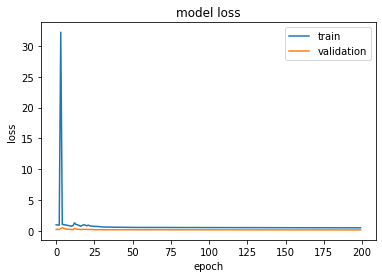

In [74]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [76]:
test_predictions = model.predict(X2_val)
op_list= []
for i in range (0, len(test_predictions)):
  op_list.append((test_predictions[i][0]))
len(op_list)
test_predictions.shape

(3455, 48)

In [77]:
test_labels = pd.DataFrame({'actual':(Y_val[:,0])})
#test_labels.rename(columns = {(Y_test.shape[1]):'actual'}, inplace = True)
#test_labels['actual']
test_labels['actual']

0      -0.23889
1      -0.25451
2      -0.21590
3      -0.15560
4       0.01705
         ...   
3450   -0.05279
3451   -0.03978
3452   -0.06060
3453   -0.12524
3454   -0.11700
Name: actual, Length: 3455, dtype: float64

In [78]:
np.reshape(test_labels, (-1,1))
test_labels.shape

(3455, 1)

In [79]:
test_labels['actual']=ct.named_transformers_['y'].inverse_transform(test_labels)
test_labels['actual']

0       18.430076
1       18.070001
2       18.960045
3       20.350089
4       24.330044
          ...    
3450    22.720081
3451    23.019990
3452    22.540044
3453    21.049953
3454    21.239903
Name: actual, Length: 3455, dtype: float64

In [80]:
predictions=pd.DataFrame({'predict':op_list})
predictions['predict'] = ct.named_transformers_['y'].inverse_transform(predictions)

In [81]:
predictions['predict']

0       19.661892
1       20.797310
2       21.711769
3       23.283152
4       25.264515
          ...    
3450    18.817223
3451    19.489849
3452    18.924669
3453    18.592396
3454    18.791698
Name: predict, Length: 3455, dtype: float32

In [82]:
test_labels['actual']

0       18.430076
1       18.070001
2       18.960045
3       20.350089
4       24.330044
          ...    
3450    22.720081
3451    23.019990
3452    22.540044
3453    21.049953
3454    21.239903
Name: actual, Length: 3455, dtype: float64

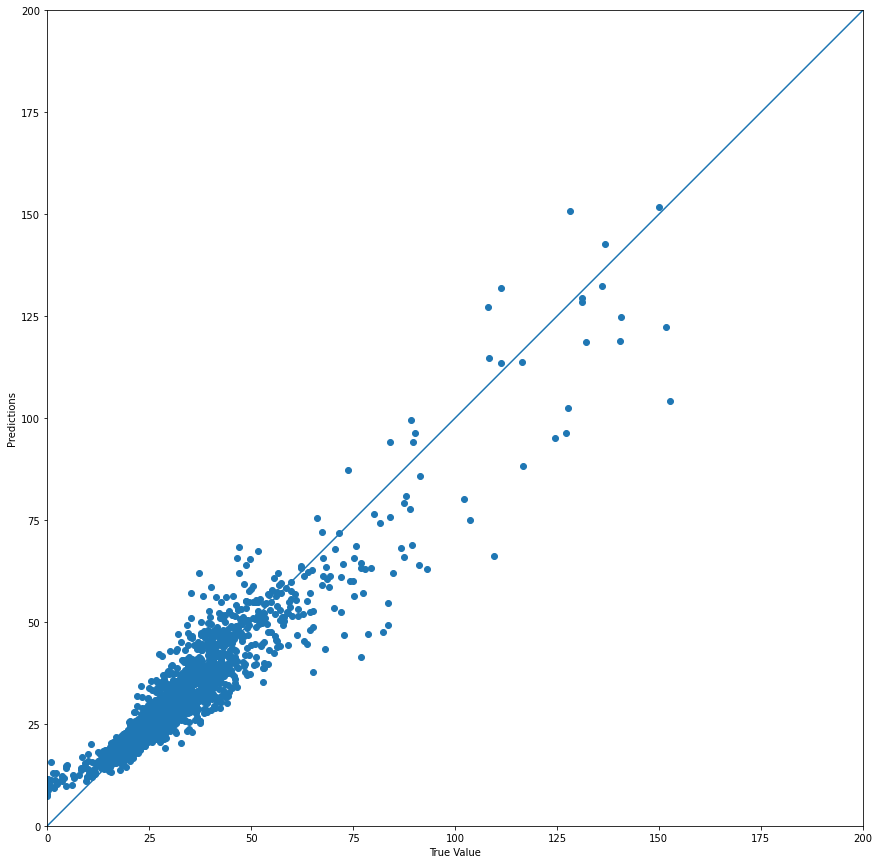

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
a = plt.axes(aspect='equal')
plt.scatter(test_labels['actual'], predictions)
plt.xlabel('True Value')
plt.ylabel('Predictions')
lims = [0, 200]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

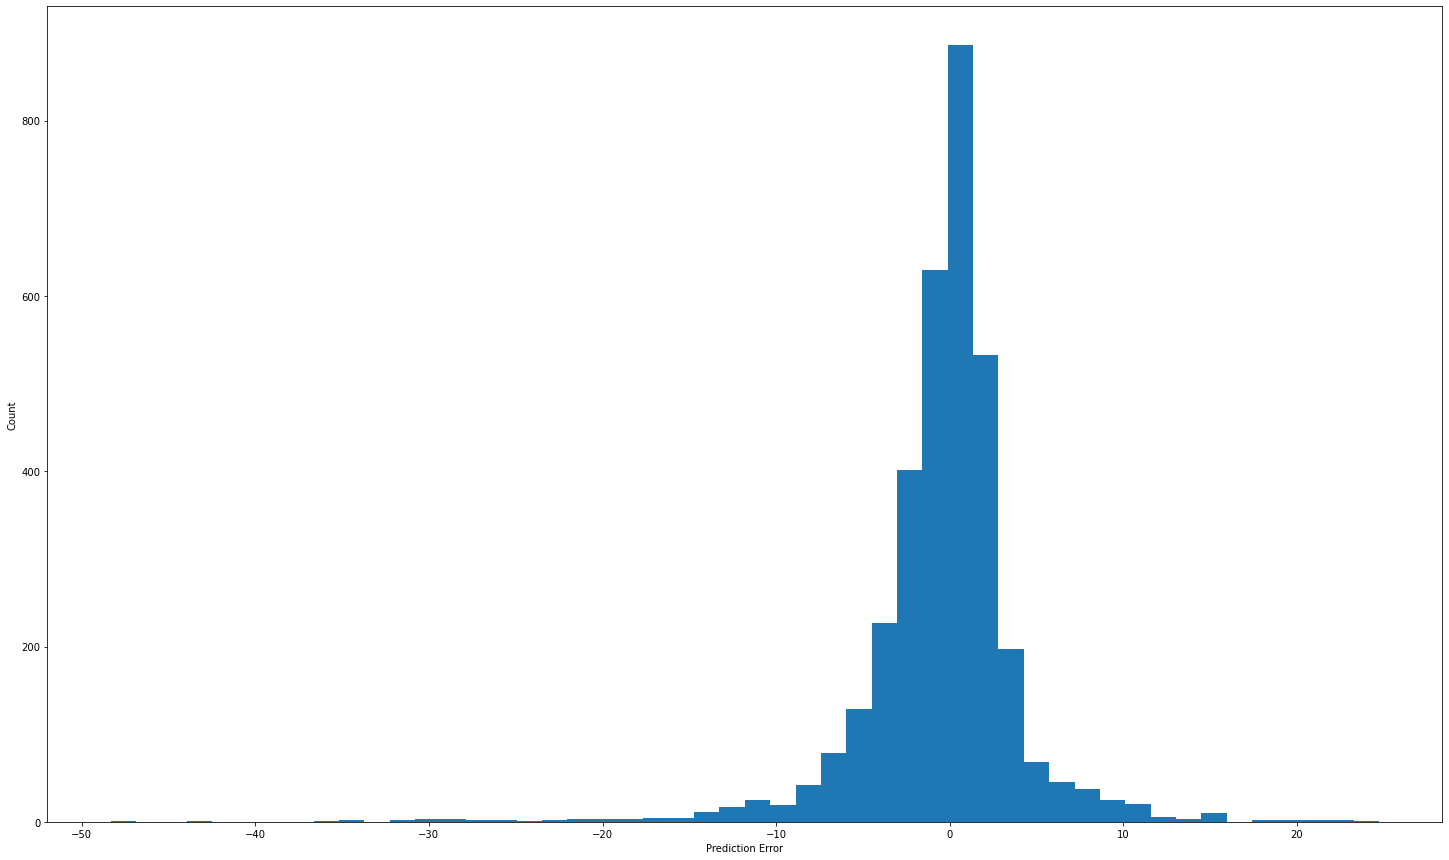

In [84]:
error = round(predictions['predict'],2) - round(test_labels['actual'],2)
plt.figure(figsize=(25,15))
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")


In [85]:
final_price=pd.DataFrame({'a':op_list})
error_b = test_labels['actual'] - predictions['predict']
print(error_b)

for i in range(1,len(predictions)):
    if((error_b[i-1])<=-6):
        final_price.a[i] =  (predictions.predict[i] - error_b[i-1])
    elif((error_b[i-1])>=6 ):
        final_price.a[i] =  (predictions.predict[i] + error_b[i-1]) 
    else:
         final_price.a[i] = predictions.predict[i]   

     predict
0  19.661892
1  20.797310
2  21.711769
3  23.283152
4  25.264515
5  26.536802
6  28.977156
7  30.450781
8  31.733475
9  31.546661 0    18.430076
1    18.070001
2    18.960045
3    20.350089
4    24.330044
5    26.380072
6    27.940011
7    29.330056
8    30.919963
9    29.889992
Name: actual, dtype: float64 0    1.230000
1    2.729999
2    2.749999
3    2.930001
4    0.930000
5    0.160001
6    1.040000
7    1.120001
8    0.810000
9    1.659999
dtype: float64


In [92]:
error_fina = round(test_labels['actual'],2) - round(final_price['a'],2)
for k in range(1,11):
    i=0
    count1=0
    for i in range(len(error_fina)):
        if ((error[i])>k) or ((error[i]<-k)):
            count1=count1+1
    a = len(final_price) - count1
    accuracy2 = (a/len(final_price))*100
    print("accuracy: with threshold of %i"%k," is %.2f"%accuracy)

accuracy: with threshold of 1  is 31.14
accuracy: with threshold of 2  is 57.08
accuracy: with threshold of 3  is 72.07
accuracy: with threshold of 4  is 80.96
accuracy: with threshold of 5  is 85.90
accuracy: with threshold of 6  is 89.26
accuracy: with threshold of 7  is 92.07
accuracy: with threshold of 8  is 93.46
accuracy: with threshold of 9  is 95.05
accuracy: with threshold of 10  is 95.89
